Elad Inbar - 205358211 Ido Livne - 203834733 Chai Hadad - 209268135

# **Import**

In [73]:
import csv
import torch
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# **Initialize Runtime**

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

# **Define dataset paths**

In [14]:
protocol_path = 'PAMAP2_Dataset/Protocol/'
optional_path = 'PAMAP2_Dataset/Optional/'

protocol_dir = sorted(os.listdir(protocol_path))
optional_dir = sorted(os.listdir(optional_path))

# **Exploratory Data Analysis**

In [36]:
optional_subjects = ["subject101", "subject105", "subject106", "subject108", "subject109"]
protocol_subjects = ["subject101", "subject102", "subject103", "subject104", "subject105", "subject106", "subject107", "subject108", "subject109"]

In [ ]:
# protocol_dat_content = [[i.strip().split() for i in open(protocol_path + protocol_subject + ".dat").readlines()] for protocol_subject in protocol_subjects]

In [37]:
# optional_dat_content = [[i.strip().split() for i in open(optional_path + optional_subject + ".dat").readlines()] for optional_subject in optional_subjects]   

In [84]:
for i in range(9):
    with open(protocol_path + protocol_subjects[i] + ".csv", "w") as file:
        writer = csv.writer(file)
        writer.writerows(protocol_dat_content[i])

In [ ]:
for i in range(5):
    with open(optional_path + optional_subjects[i] + ".csv", "w") as file:
        writer = csv.writer(file)
        writer.writerows(optional_dat_content[i])

In [86]:
#path to our csv files
path_to_csv = protocol_path

columns_to_keep = ['timestamp (s)', 'activityID', 'heart rate (bpm)'] # (1, 2, 3)

# 4-20 (3-19)
columns_to_keep += ['IMU hand temperature (°C)'] # 1 (3)
columns_to_keep += ['IMU hand 3D-acceleration data (ms-2), scale +-16g ' + str(i + 1) for i in range(3)] # 2-4 (4-6)
columns_to_keep += ['IMU hand 3D-acceleration data (ms-2), scale +-6g ' + str(i + 1) for i in range(3)] # 5-7 (7-9)
columns_to_keep += ['IMU hand 3D-gyroscope data (rad/s) ' + str(i + 1) for i in range(3)] # 8-10 (10-12)
columns_to_keep += ['IMU hand 3D-magnetometer (µT) ' + str(i + 1) for i in range(3)] # 11-13 (13-15)
columns_to_keep += ['IMU hand orientation ' + str(i + 1) for i in range(4)] # 14-17 (16-19)

# 21-37 (20-36)
columns_to_keep += ['IMU chest temperature (°C)'] # 1 (20)
columns_to_keep += ['IMU chest 3D-acceleration data (ms-2), scale +-16g ' + str(i + 1) for i in range(3)] # 2-4 (21-23)
columns_to_keep += ['IMU chest 3D-acceleration data (ms-2), scale +-6g ' + str(i + 1) for i in range(3)] # 5-7 (24-26)
columns_to_keep += ['IMU chest 3D-gyroscope data (rad/s) ' + str(i + 1) for i in range(3)] # 8-10 (27-29)
columns_to_keep += ['IMU chest 3D-magnetometer (µT) ' + str(i + 1) for i in range(3)] # 11-13 (30-32)
columns_to_keep += ['IMU chest orientation ' + str(i + 1) for i in range(4)] # 14-17 (33-36)

# 38-54 (37-53)
columns_to_keep += ['IMU ankle temperature (°C)'] # 1 (37)
columns_to_keep += ['IMU ankle 3D-acceleration data (ms-2), scale +-16g ' + str(i + 1) for i in range(3)] # 2-4 (38-40)
columns_to_keep += ['IMU ankle 3D-acceleration data (ms-2), scale +-6g ' + str(i + 1) for i in range(3)] # 5-7 (41-43)
columns_to_keep += ['IMU ankle 3D-gyroscope data (rad/s) ' + str(i + 1) for i in range(3)] # 8-10 (44-46)
columns_to_keep += ['IMU ankle 3D-magnetometer (µT) ' + str(i + 1) for i in range(3)] # 11-13 (47-49)
columns_to_keep += ['IMU ankle orientation ' + str(i + 1) for i in range(4)] # 14-17 (50-53)

In [87]:
protocol_dataframes = {}
for protocol_subject in protocol_subjects:
    protocol_dataframes[protocol_subject] = pd.read_csv(path_to_csv + protocol_subject + ".csv", names=columns_to_keep)
    protocol_dataframes[protocol_subject].drop(protocol_dataframes[protocol_subject].columns[[16,17,18,19, 33,34,35,36, 50,51,52,53]], axis=1)

In [ ]:
optional_dataframes = {}
for optional_subject in optional_subjects:
    optional_dataframes[optional_subject] = pd.read_csv(path_to_csv + optional_subject + ".csv", names=columns_to_keep)
    optional_dataframes[optional_subject].drop(optional_dataframes[optional_subject].columns[[16,17,18,19, 33,34,35,36, 50,51,52,53]], axis=1)

In [89]:
protocol_dataframes["subject101"]

,timestamp (s),activityID,heart rate (bpm),IMU hand temperature (°C),"IMU hand 3D-acceleration data (ms-2), scale +-16g 1","IMU hand 3D-acceleration data (ms-2), scale +-16g 2","IMU hand 3D-acceleration data (ms-2), scale +-16g 3","IMU hand 3D-acceleration data (ms-2), scale +-6g 1","IMU hand 3D-acceleration data (ms-2), scale +-6g 2","IMU hand 3D-acceleration data (ms-2), scale +-6g 3",...,IMU ankle 3D-gyroscope data (rad/s) 1,IMU ankle 3D-gyroscope data (rad/s) 2,IMU ankle 3D-gyroscope data (rad/s) 3,IMU ankle 3D-magnetometer (µT) 1,IMU ankle 3D-magnetometer (µT) 2,IMU ankle 3D-magnetometer (µT) 3,IMU ankle orientation 1,IMU ankle orientation 2,IMU ankle orientation 3,IMU ankle orientation 4
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376412,3772.50,0,NaN,30.5,2.02477,7.29553,5.74194,2.06573,6.57692,5.92695,...,0.048745,-0.008034,0.018600,-58.8381,-36.2397,-11.0980,1.0,0.0,0.0,0.0
376413,3772.51,0,NaN,30.5,2.10836,7.86504,5.85674,2.08754,7.42244,5.87977,...,0.042113,0.024647,0.013375,-58.9537,-36.3379,-11.7170,1.0,0.0,0.0,0.0
376414,3772.52,0,NaN,30.5,2.07163,8.39581,5.77742,2.13833,8.05640,5.90853,...,-0.014889,0.026009,0.025054,-59.1781,-35.8985,-10.9678,1.0,0.0,0.0,0.0
376415,3772.53,0,NaN,30.5,2.19569,8.77634,6.00892,2.11251,8.53989,5.93770,...,0.047026,-0.035531,0.024640,-58.8299,-36.6845,-10.8553,1.0,0.0,0.0,0.0


In [55]:
def count_activities_per_subject(subject_df):
    acts_values_unfiltered = subject_df['activityID'].tolist()
    acts_values = []
    for i in range(len(acts_values_unfiltered)):
        if i == 0 or acts_values_unfiltered[i-1] != acts_values_unfiltered[i] :
            acts_values.append(acts_values_unfiltered[i]) 
    acts_set = set(acts_values)
    res = {}
    for act in acts_set:
        if act != 0:
            res[act] = 0
    for act in acts_values:
        if act != 0:
            res[act] = res[act] + 1
    return res

In [56]:
activity_count = {}
for protocol_subject in protocol_subjects:
    temp_acts = count_activities_per_subject(dataframes[protocol_subject])
    for key in temp_acts.keys():
        if key in activity_count.keys():
            activity_count[key] += temp_acts[key]
        else:
            activity_count[key] = temp_acts[key]

In [57]:
activity_count

{1: 8, 2: 8, 3: 8, 4: 8, 5: 7, 6: 7, 7: 7, 12: 16, 13: 17, 16: 8, 17: 8, 24: 6}

In [74]:
def get_activity_name_by_id(id):
    id_to_names = {}
    id_to_names[1] = 'lying'
    id_to_names[2] = 'sitting'
    id_to_names[3] = 'standing'
    id_to_names[4] = 'walking'
    id_to_names[5] = 'running'
    id_to_names[6] = 'cycling'
    id_to_names[7] = 'Nordic walking'
    id_to_names[9] = 'watching TV'
    id_to_names[10] = 'computer work'
    id_to_names[11] = 'car driving'
    id_to_names[12] = 'ascending stairs'
    id_to_names[13] = 'descending stairs'
    id_to_names[16] = 'vacuum cleaning'
    id_to_names[17] = 'ironing'
    id_to_names[18] = 'folding laundry'
    id_to_names[19] = 'house cleaning'
    id_to_names[20] = 'playing soccer'
    id_to_names[24] = 'rope jumping'
    id_to_names[0] = 'other'
    return id_to_names[id]

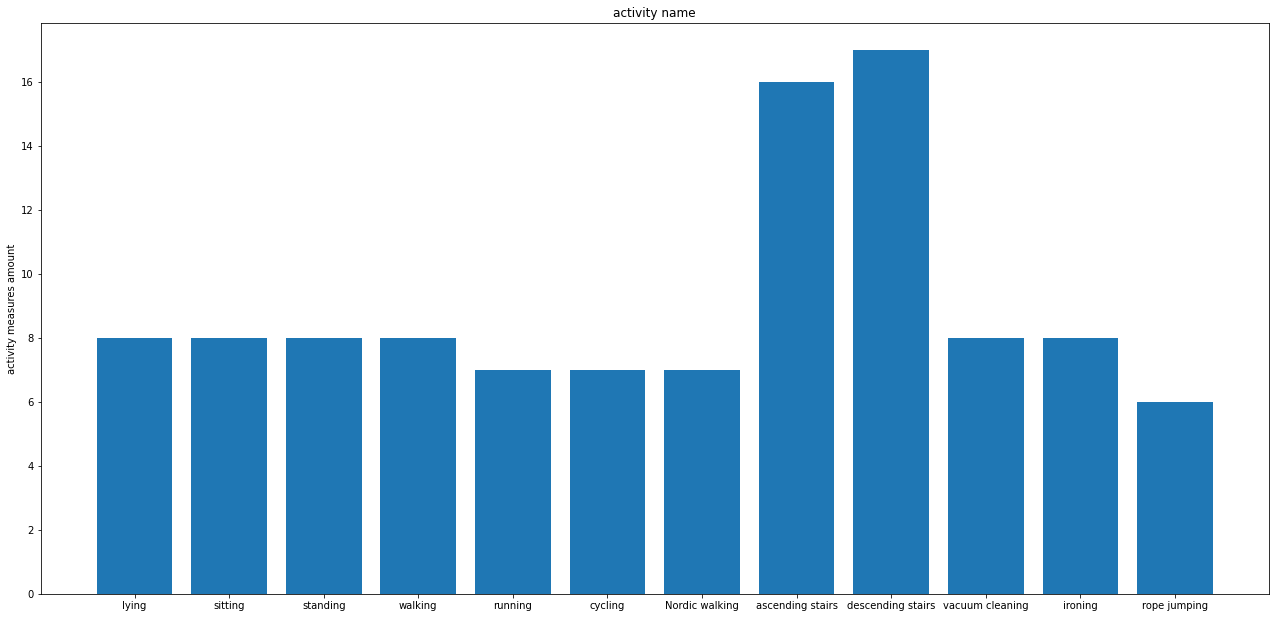

In [77]:
values = activity_count

keys_lst = []
count_lst = []
for key in values.keys():
    keys_lst.append(key)
    count_lst.append(values[key])

activity_names = [ get_activity_name_by_id(act_id) for act_id in keys_lst]

fig, ax = plt.subplots()
fig.set_size_inches(22, 10.5)

bar_labels = keys_lst
ax.bar(activity_names, count_lst)
ax.set_ylabel('activity measures amount')
ax.set_title('activity name')


plt.show()

In [ ]:
def get_subjcet_activity(activity_id, df):
    dכ[]